# Online News Popularity

   Online news popularity dataset has features about articles published by Mashable in a period of two years . Aim is to predict the popularity based on the shares it has got. Dataset taken from https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

In [2]:
import pandas as pd
%pylab inline

import numpy as np
from sklearn.cross_validation import train_test_split
import math


Populating the interactive namespace from numpy and matplotlib


In [3]:
df=pd.read_csv("OnlineNewsPopularity.csv")

In [4]:
df.head(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [4]:
df.columns

Index([u'url', u' timedelta', u' n_tokens_title', u' n_tokens_content',
       u' n_unique_tokens', u' n_non_stop_words', u' n_non_stop_unique_tokens',
       u' num_hrefs', u' num_self_hrefs', u' num_imgs', u' num_videos',
       u' average_token_length', u' num_keywords',
       u' data_channel_is_lifestyle', u' data_channel_is_entertainment',
       u' data_channel_is_bus', u' data_channel_is_socmed',
       u' data_channel_is_tech', u' data_channel_is_world', u' kw_min_min',
       u' kw_max_min', u' kw_avg_min', u' kw_min_max', u' kw_max_max',
       u' kw_avg_max', u' kw_min_avg', u' kw_max_avg', u' kw_avg_avg',
       u' self_reference_min_shares', u' self_reference_max_shares',
       u' self_reference_avg_sharess', u' weekday_is_monday',
       u' weekday_is_tuesday', u' weekday_is_wednesday',
       u' weekday_is_thursday', u' weekday_is_friday', u' weekday_is_saturday',
       u' weekday_is_sunday', u' is_weekend', u' LDA_00', u' LDA_01',
       u' LDA_02', u' LDA_03', u' LD

In [5]:
df = df.rename(columns = {
       'url': ' url'
        
    })

In [6]:
df.rename(columns=lambda x: x[1:], inplace=True)

In [7]:
df.columns

Index([u'url', u'timedelta', u'n_tokens_title', u'n_tokens_content',
       u'n_unique_tokens', u'n_non_stop_words', u'n_non_stop_unique_tokens',
       u'num_hrefs', u'num_self_hrefs', u'num_imgs', u'num_videos',
       u'average_token_length', u'num_keywords', u'data_channel_is_lifestyle',
       u'data_channel_is_entertainment', u'data_channel_is_bus',
       u'data_channel_is_socmed', u'data_channel_is_tech',
       u'data_channel_is_world', u'kw_min_min', u'kw_max_min', u'kw_avg_min',
       u'kw_min_max', u'kw_max_max', u'kw_avg_max', u'kw_min_avg',
       u'kw_max_avg', u'kw_avg_avg', u'self_reference_min_shares',
       u'self_reference_max_shares', u'self_reference_avg_sharess',
       u'weekday_is_monday', u'weekday_is_tuesday', u'weekday_is_wednesday',
       u'weekday_is_thursday', u'weekday_is_friday', u'weekday_is_saturday',
       u'weekday_is_sunday', u'is_weekend', u'LDA_00', u'LDA_01', u'LDA_02',
       u'LDA_03', u'LDA_04', u'global_subjectivity',
       u'global_sen

In [8]:
df.timedelta.value_counts()

91.0     104
72.0     102
84.0     101
59.0      99
29.0      99
210.0     97
182.0     96
37.0      95
28.0      95
127.0     94
161.0     94
52.0      94
77.0      93
35.0      93
23.0      93
79.0      93
100.0     92
36.0      92
92.0      92
66.0      92
71.0      91
169.0     90
121.0     90
49.0      90
126.0     90
135.0     90
50.0      89
64.0      89
70.0      89
260.0     89
        ... 
243.0     19
432.0     19
522.0     19
264.0     19
145.0     19
481.0     19
543.0     19
495.0     19
557.0     19
677.0     19
621.0     19
383.0     19
494.0     18
691.0     18
508.0     18
585.0     18
404.0     18
299.0     18
684.0     18
369.0     17
571.0     17
705.0     17
719.0     17
291.0     16
635.0     16
375.0     15
376.0     15
656.0     15
730.0     12
8.0        8
Name: timedelta, dtype: int64

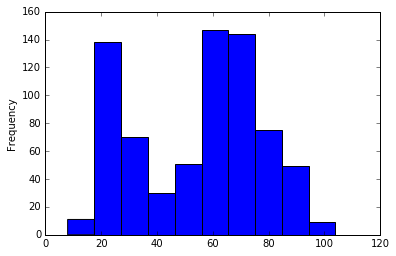

In [14]:
df.timedelta.value_counts().plot('hist')

In [9]:
df[df.timedelta.isnull()]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares


In [10]:
df.shape

(39644, 61)

In [9]:
df.isnull()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
df.n_tokens_title.value_counts()

10.0    7358
11.0    6960
9.0     6278
12.0    5299
8.0     4227
13.0    3509
7.0     2120
14.0    1733
6.0      805
15.0     756
16.0     259
5.0      184
17.0      91
4.0       28
18.0      22
19.0       6
3.0        5
20.0       2
23.0       1
2.0        1
Name: n_tokens_title, dtype: int64

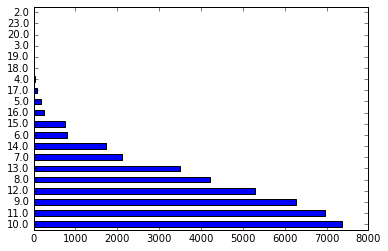

In [13]:
df.n_tokens_title.value_counts().plot('barh')

In [20]:
df.n_tokens_content.value_counts()

0.0       1181
286.0      101
225.0       86
335.0       86
279.0       85
242.0       84
301.0       82
246.0       80
294.0       80
258.0       80
232.0       80
256.0       79
197.0       79
318.0       79
317.0       78
276.0       78
230.0       78
281.0       78
292.0       78
209.0       78
315.0       78
303.0       77
235.0       76
190.0       76
299.0       76
223.0       76
263.0       76
252.0       75
240.0       75
241.0       75
          ... 
2191.0       1
2200.0       1
2133.0       1
2201.0       1
2207.0       1
2211.0       1
2213.0       1
2216.0       1
2219.0       1
2220.0       1
2178.0       1
2171.0       1
2170.0       1
2168.0       1
2136.0       1
2141.0       1
2142.0       1
2143.0       1
2146.0       1
2148.0       1
2150.0       1
2152.0       1
2153.0       1
2155.0       1
2161.0       1
2162.0       1
2164.0       1
2165.0       1
2166.0       1
8474.0       1
Name: n_tokens_content, dtype: int64

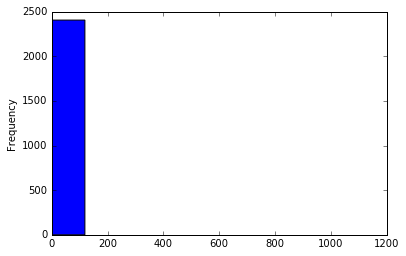

In [15]:
df.n_tokens_content.value_counts().plot('hist')

In [21]:
df.n_unique_tokens.value_counts()

0.000000    1181
0.666667      10
0.552083       9
0.649746       8
0.648780       8
0.653846       8
0.623529       8
0.613475       8
0.642512       8
0.674757       8
0.618110       8
0.640394       8
0.636364       8
0.656977       8
0.694805       8
0.740157       8
0.560322       7
0.602459       7
0.569659       7
0.653846       7
0.621399       7
0.685185       7
0.601695       7
0.656250       7
0.670968       7
0.592334       7
0.697987       7
0.666667       7
0.784314       7
0.636752       7
            ... 
0.411150       1
0.283109       1
0.556054       1
0.444338       1
0.501057       1
0.446244       1
0.393378       1
0.393414       1
0.467169       1
0.508685       1
0.530769       1
0.580556       1
0.625767       1
0.500426       1
0.493802       1
0.474453       1
0.497199       1
0.447706       1
0.588110       1
0.630000       1
0.452983       1
0.474032       1
0.484337       1
0.528090       1
0.632787       1
0.693811       1
0.597884       1
0.493289      

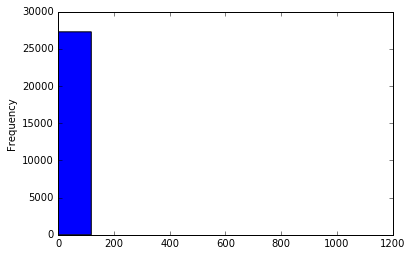

In [17]:
df.n_unique_tokens.value_counts().plot('hist')

In [22]:
df.n_non_stop_words.value_counts()

0.0    1181
1.0     138
1.0     136
1.0     133
1.0     129
1.0     128
1.0     127
1.0     126
1.0     125
1.0     124
1.0     124
1.0     123
1.0     123
1.0     121
1.0     120
1.0     120
1.0     120
1.0     120
1.0     120
1.0     119
1.0     119
1.0     119
1.0     118
1.0     118
1.0     118
1.0     118
1.0     117
1.0     117
1.0     117
1.0     116
       ... 
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
1.0       1
Name: n_non_stop_words, dtype: int64

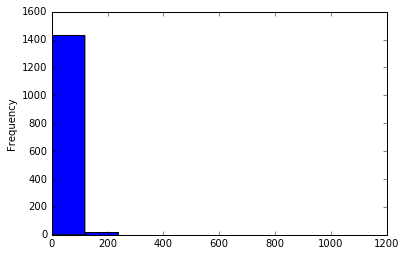

In [18]:
df.n_non_stop_words.value_counts().plot('hist')

In [23]:
df.n_non_stop_unique_tokens.value_counts()

0.000000    1181
0.815534      13
0.765625      12
0.762821      12
0.707865      12
0.873239      12
0.824427      12
0.855670      12
0.835052      11
0.750000      11
0.760000      11
0.820225      11
0.702970      11
0.727273      11
0.830986      11
0.855263      11
0.887097      10
0.828283      10
0.830000      10
0.756250      10
0.762590      10
0.820513      10
0.798246      10
0.812500      10
0.868852      10
0.815789      10
0.767442      10
0.786517      10
0.873418      10
0.882353      10
            ... 
0.543750       1
0.593985       1
0.628049       1
0.735690       1
0.623060       1
0.560331       1
0.803109       1
0.642336       1
0.657692       1
0.596154       1
0.662763       1
0.672566       1
0.646341       1
0.496614       1
0.632495       1
0.623337       1
0.602151       1
0.505063       1
0.558511       1
0.592445       1
0.693925       1
0.674322       1
0.677987       1
0.638060       1
0.639362       1
0.541254       1
0.483073       1
0.760797      

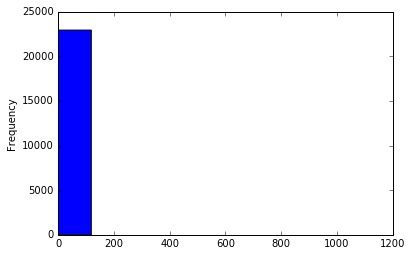

In [19]:
df.n_non_stop_unique_tokens.value_counts().plot('hist')

In [24]:
df.num_hrefs.value_counts()

4.0      3470
5.0      3431
6.0      3154
3.0      2871
7.0      2782
8.0      2273
9.0      1990
2.0      1836
10.0     1730
11.0     1440
0.0      1299
12.0     1279
13.0     1130
1.0       963
14.0      962
15.0      890
16.0      739
17.0      661
18.0      623
19.0      543
20.0      526
21.0      466
22.0      439
23.0      378
24.0      339
25.0      300
26.0      258
28.0      254
27.0      236
29.0      213
         ... 
90.0        2
97.0        2
101.0       1
145.0       1
148.0       1
150.0       1
152.0       1
153.0       1
142.0       1
158.0       1
159.0       1
161.0       1
162.0       1
171.0       1
186.0       1
143.0       1
124.0       1
140.0       1
127.0       1
123.0       1
88.0        1
92.0        1
116.0       1
108.0       1
107.0       1
106.0       1
98.0        1
104.0       1
187.0       1
304.0       1
Name: num_hrefs, dtype: int64

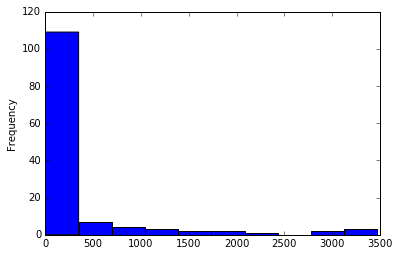

In [20]:
df.num_hrefs.value_counts().plot('hist')

In [25]:
df.num_self_hrefs.value_counts()

2.0      7624
1.0      6788
3.0      6612
0.0      5350
4.0      4603
5.0      2922
6.0      1851
7.0      1127
8.0       677
9.0       452
10.0      325
11.0      227
12.0      181
13.0      122
15.0       85
14.0       84
20.0       69
21.0       57
16.0       49
18.0       42
19.0       42
17.0       40
22.0       31
32.0       30
23.0       29
31.0       28
24.0       25
25.0       20
30.0       19
28.0       17
29.0       17
33.0       15
27.0       14
26.0       12
34.0       11
39.0        4
51.0        4
36.0        4
41.0        4
40.0        3
63.0        3
35.0        3
38.0        2
54.0        2
56.0        2
49.0        2
50.0        2
62.0        1
60.0        1
65.0        1
55.0        1
44.0        1
53.0        1
47.0        1
43.0        1
42.0        1
37.0        1
74.0        1
116.0       1
Name: num_self_hrefs, dtype: int64

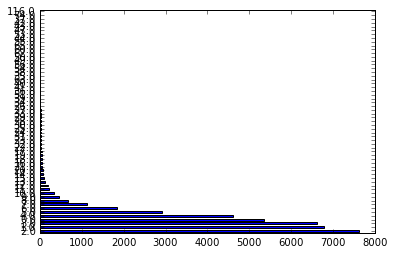

In [22]:
df.num_self_hrefs.value_counts().plot('barh')

In [26]:
df.num_imgs.value_counts()

1.0      18119
0.0       6987
2.0       2965
3.0       1223
11.0      1125
10.0       860
4.0        668
12.0       601
6.0        571
9.0        546
8.0        509
13.0       508
15.0       498
5.0        478
7.0        421
16.0       399
14.0       392
20.0       314
21.0       258
17.0       212
18.0       202
19.0       175
25.0       164
22.0       148
23.0       114
26.0       113
30.0        99
24.0        79
35.0        78
32.0        76
         ...  
75.0         5
43.0         5
67.0         4
99.0         4
92.0         4
71.0         4
62.0         4
63.0         3
76.0         3
80.0         3
101.0        2
70.0         2
111.0        2
79.0         2
58.0         2
66.0         1
91.0         1
108.0        1
57.0         1
93.0         1
59.0         1
83.0         1
90.0         1
84.0         1
65.0         1
77.0         1
73.0         1
69.0         1
68.0         1
128.0        1
Name: num_imgs, dtype: int64

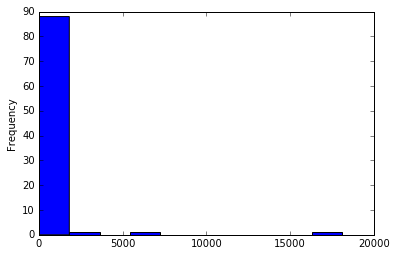

In [24]:
df.num_imgs.value_counts().plot('hist')

In [27]:
df.num_videos.value_counts()

0.0     25026
1.0      9483
2.0      2189
3.0       527
11.0      285
4.0       245
10.0      213
21.0      202
5.0       149
26.0      124
6.0       116
16.0      103
9.0       101
7.0        90
8.0        82
15.0       81
12.0       79
13.0       73
14.0       69
25.0       68
20.0       59
17.0       54
18.0       29
27.0       28
22.0       25
19.0       16
31.0       15
33.0       15
24.0       12
23.0       11
28.0        9
73.0        7
50.0        7
51.0        6
34.0        5
74.0        5
30.0        4
32.0        4
29.0        3
35.0        3
58.0        3
36.0        2
75.0        2
38.0        2
42.0        2
48.0        2
59.0        2
65.0        2
66.0        1
49.0        1
46.0        1
53.0        1
91.0        1
Name: num_videos, dtype: int64

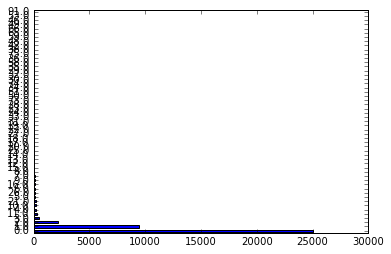

In [25]:
df.num_videos.value_counts().plot('barh')

In [28]:
df.average_token_length.value_counts()

0.000000    1181
5.000000      77
4.500000      72
4.666667      58
4.600000      35
4.750000      32
4.800000      28
4.428571      26
4.833333      24
4.625000      23
4.700000      22
4.875000      22
4.555556      21
4.777778      21
4.714286      20
4.571429      19
4.333333      18
4.818182      17
4.857143      16
4.400000      16
4.615385      15
4.727273      15
4.909091      15
4.545455      13
4.733333      13
4.789474      13
4.809524      13
4.583333      13
4.692308      12
4.000000      12
            ... 
4.625912       1
4.667851       1
4.323690       1
4.095420       1
4.436992       1
4.208748       1
4.549587       1
4.347463       1
4.800752       1
4.300567       1
4.810613       1
4.869674       1
4.944591       1
4.971014       1
4.108553       1
4.015564       1
4.534591       1
4.351377       1
4.825316       1
4.592798       1
4.731501       1
4.887218       1
4.445437       1
4.770925       1
4.765363       1
4.936000       1
4.316800       1
4.829016      

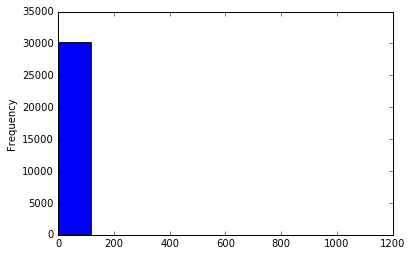

In [26]:
df.average_token_length.value_counts().plot('hist')

In [29]:
df.num_keywords.value_counts()

7.0     7322
6.0     6801
10.0    6708
8.0     6094
5.0     4829
9.0     4732
4.0     2427
3.0      635
1.0       51
2.0       45
Name: num_keywords, dtype: int64

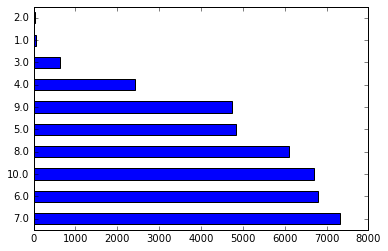

In [27]:
df.num_keywords.value_counts().plot('barh')

In [30]:
df.data_channel_is_lifestyle.value_counts()

0.0    37545
1.0     2099
Name: data_channel_is_lifestyle, dtype: int64

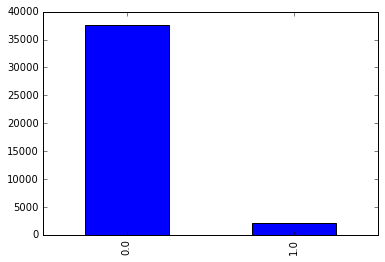

In [28]:
df.data_channel_is_lifestyle.value_counts().plot('bar')

In [31]:
df.data_channel_is_entertainment.value_counts()

0.0    32587
1.0     7057
Name: data_channel_is_entertainment, dtype: int64

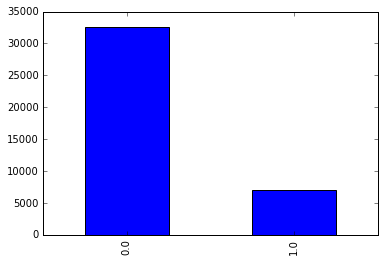

In [29]:
df.data_channel_is_entertainment.value_counts().plot('bar')

In [32]:
df.data_channel_is_bus.value_counts()

0.0    33386
1.0     6258
Name: data_channel_is_bus, dtype: int64

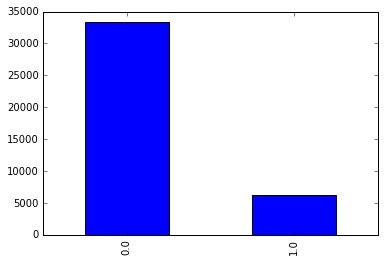

In [30]:
df.data_channel_is_bus.value_counts().plot('bar')

In [33]:
df.data_channel_is_socmed.value_counts()

0.0    37321
1.0     2323
Name: data_channel_is_socmed, dtype: int64

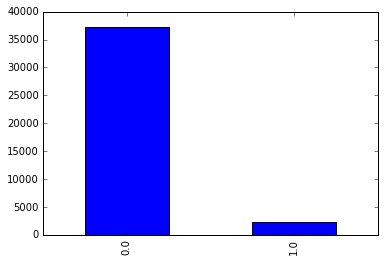

In [31]:
df.data_channel_is_socmed.value_counts().plot('bar')

In [34]:
df.data_channel_is_tech.value_counts()

0.0    32298
1.0     7346
Name: data_channel_is_tech, dtype: int64

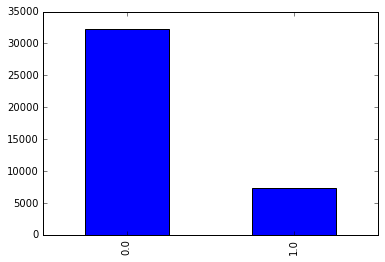

In [32]:
df.data_channel_is_tech.value_counts().plot('bar')

In [35]:
df.data_channel_is_world.value_counts()

0.0    31217
1.0     8427
Name: data_channel_is_world, dtype: int64

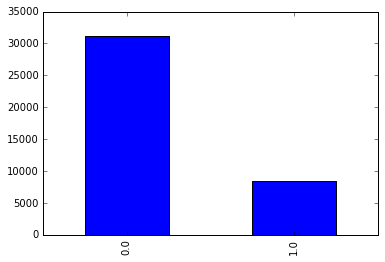

In [33]:
df.data_channel_is_world.value_counts().plot('bar')

In [36]:
df.kw_min_min.value_counts()

-1.0      22980
 4.0      11908
 217.0     4636
 0.0         79
 47.0         6
 57.0         5
 86.0         4
 82.0         3
 45.0         2
 63.0         2
 294.0        2
 129.0        2
 88.0         2
 98.0         1
 97.0         1
 377.0        1
 116.0        1
 201.0        1
 80.0         1
 65.0         1
 138.0        1
 162.0        1
 184.0        1
 42.0         1
 41.0         1
 318.0        1
Name: kw_min_min, dtype: int64

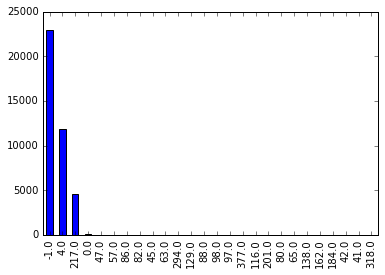

In [34]:
df.kw_min_min.value_counts().plot('bar')

In [37]:
df.kw_max_min.value_counts()

1100.0      1507
1200.0      1188
1300.0       830
0.0          819
1400.0       785
1000.0       735
1500.0       563
1600.0       504
1700.0       379
1800.0       287
1900.0       284
2000.0       256
2100.0       241
224.0        230
2200.0       215
440.0        195
176.0        187
330.0        180
488.0        169
325.0        168
211.0        165
2300.0       152
469.0        149
428.0        143
522.0        143
504.0        141
400.0        139
529.0        135
473.0        131
2500.0       130
            ... 
16500.0        1
33100.0        1
104100.0       1
17000.0        1
154.0          1
38000.0        1
17400.0        1
449.0          1
164.0          1
18300.0        1
37000.0        1
18600.0        1
18700.0        1
36700.0        1
102200.0       1
18800.0        1
19100.0        1
19200.0        1
19700.0        1
19800.0        1
20300.0        1
418.0          1
36200.0        1
210.0          1
20800.0        1
34300.0        1
33900.0        1
98700.0       

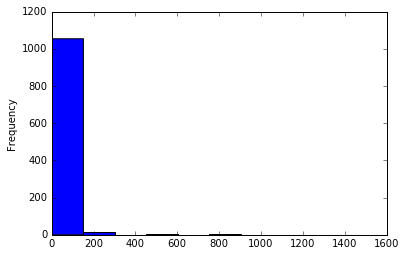

In [35]:
df.kw_max_min.value_counts().plot('hist')

In [38]:
df.kw_avg_min.value_counts()

-1.000000        694
 0.000000         81
 43.250000        48
 125.000000       45
 107.666667       44
 80.500000        43
 194.000000       42
 11.500000        39
 282.000000       37
 63.000000        37
 103.000000       34
 143.000000       33
 101.400000       32
 82.000000        32
 135.000000       30
 15.666667        30
 38.250000        28
 133.000000       28
 113.000000       28
 21.000000        27
-0.482000         26
 301.000000       26
 161.000000       26
 28.666667        26
 84.000000        25
 4.000000         25
 188.000000       24
 101.000000       24
 203.000000       24
 292.000000       24
                ... 
 1060.333333       1
 200.510000        1
 205.025714        1
 234.600000        1
 1152.285714       1
 194.397500        1
 265.142857        1
 34855.125000      1
 501.142857        1
 644.111111        1
 199.621111        1
 179.518000        1
 432.059000        1
 441.142857        1
 528.666667        1
 143.176667        1
 262.111111  

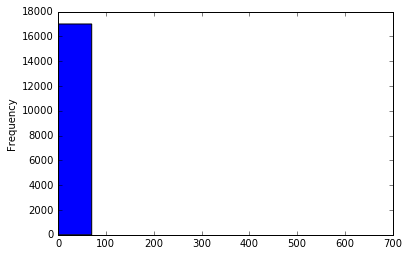

In [36]:
df.kw_avg_min.value_counts().plot('hist')

In [39]:
df.kw_min_max.value_counts()

0.0         17108
1500.0        379
1400.0        371
1200.0        367
1300.0        361
1100.0        344
1600.0        329
1900.0        315
2100.0        303
2000.0        303
1800.0        295
1700.0        286
2200.0        264
5000.0        229
4800.0        226
2300.0        219
2900.0        210
3800.0        207
2600.0        198
2400.0        192
3100.0        191
2700.0        185
3900.0        180
6500.0        179
2800.0        178
3200.0        173
2500.0        171
3500.0        170
3400.0        169
3000.0        157
            ...  
670.0           1
669.0           1
668.0           1
869.0           1
51900.0         1
32800.0         1
659.0           1
658.0           1
876.0           1
654.0           1
877.0           1
649.0           1
647.0           1
646.0           1
645.0           1
643.0           1
882.0           1
640.0           1
883.0           1
638.0           1
636.0           1
884.0           1
634.0           1
886.0           1
888.0     

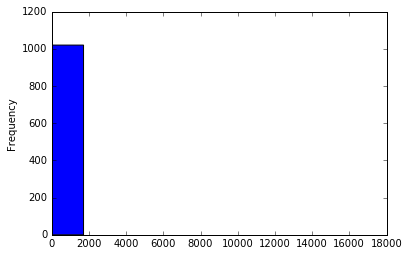

In [37]:
df.kw_min_max.value_counts().plot('hist')

In [40]:
df.kw_max_max.value_counts()

843300.0    30204
690400.0     3986
617900.0     2263
69100.0      1265
51900.0       829
80400.0       401
39400.0       149
28000.0       131
37400.0       122
17100.0       101
0.0            79
227300.0       72
306100.0        8
104100.0        5
663600.0        4
73100.0         2
441000.0        2
310800.0        2
67500.0         2
118700.0        2
139600.0        1
11100.0         1
208300.0        1
210300.0        1
57600.0         1
15000.0         1
18200.0         1
86200.0         1
27700.0         1
35800.0         1
233400.0        1
41600.0         1
111300.0        1
53100.0         1
93800.0         1
Name: kw_max_max, dtype: int64

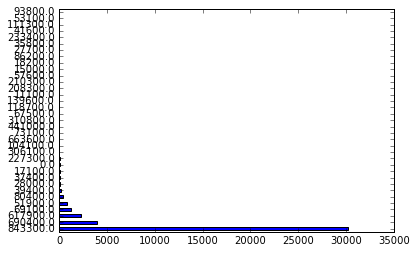

In [38]:
df.kw_max_max.value_counts().plot('barh')

In [41]:
df.kw_avg_max.value_counts()

0.000000         79
843300.000000    57
406425.000000    46
384225.000000    44
483900.000000    40
534200.000000    37
559366.666667    30
383800.000000    29
741366.666667    26
350800.000000    26
498200.000000    24
551300.000000    23
305840.000000    22
309440.000000    21
266150.000000    21
292960.000000    19
321750.000000    19
208700.000000    18
279725.000000    17
378725.000000    17
732433.333333    17
341766.666667    16
400650.000000    16
378450.000000    15
690400.000000    15
367180.000000    15
278675.000000    14
556025.000000    13
257400.000000    13
380350.000000    12
                 ..
123408.900000     1
139962.500000     1
137211.111111     1
805733.333333     1
21228.571429      1
41450.000000      1
254626.111111     1
434580.000000     1
237975.000000     1
136142.857143     1
41375.000000      1
631200.000000     1
172450.000000     1
303525.000000     1
536300.000000     1
283185.714286     1
246494.100000     1
382133.333333     1
238010.000000     1


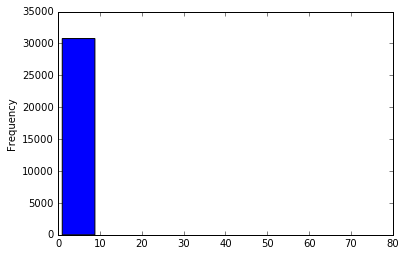

In [39]:
df.kw_avg_max.value_counts().plot('hist')

In [42]:
df.kw_min_avg.value_counts()

0.000000       17102
1100.000000      154
1200.000000      133
1300.000000      123
1400.000000      110
1500.000000       99
1600.000000       85
1000.000000       68
1700.000000       68
1900.000000       65
1800.000000       58
2000.000000       53
2200.000000       34
2100.000000       26
2300.000000       25
1550.000000       24
1450.000000       24
2500.000000       22
2400.000000       21
2423.343208       19
1150.000000       19
1350.000000       18
1924.437956       17
1650.000000       17
1950.000000       16
2600.000000       16
1850.000000       15
1750.000000       15
1250.000000       15
2700.000000       11
               ...  
2711.266238        1
1548.416667        1
2470.920000        1
2080.564103        1
2056.333333        1
1002.700000        1
2040.473868        1
2818.495308        1
2622.600000        1
2970.885906        1
2863.513834        1
2150.969880        1
2145.488432        1
2927.651515        1
1179.333333        1
1395.169492        1
1439.107143  

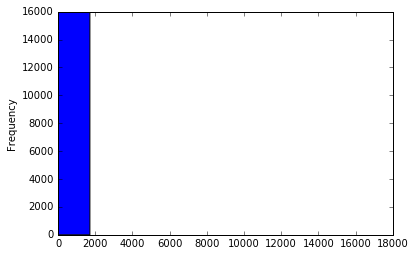

In [40]:
df.kw_min_avg.value_counts().plot('hist')

In [43]:
df.kw_max_avg.value_counts()

0.000000        79
3483.305109     44
3517.727146     44
3445.033990     41
3396.691809     36
3399.331393     36
3483.538140     34
3449.834774     34
3572.013501     34
4600.000000     33
3449.327025     33
3443.120085     33
3447.585836     33
3567.760761     33
3387.960559     33
3287.637782     32
3575.743282     32
3578.303885     32
3421.278567     32
3490.598812     32
3406.453889     32
3437.392296     31
3428.871058     31
3256.261714     30
3481.799712     30
3532.775830     29
3446.075532     29
3454.049397     29
3573.086415     29
3481.800852     29
                ..
4110.818182      1
3642.891239      1
4774.700000      1
4368.472249      1
10329.100775     1
4841.222222      1
4415.501764      1
12807.333333     1
4851.800000      1
2892.708333      1
24276.800000     1
3740.916667      1
9016.666667      1
4654.576065      1
3387.864198      1
8533.333333      1
3504.730375      1
6077.111111      1
6781.476190      1
4109.449015      1
3807.493870      1
4370.025641 

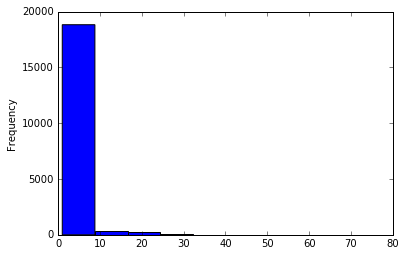

In [41]:
df.kw_max_avg.value_counts().plot('hist')

In [45]:
df.kw_avg_avg.value_counts()

0.000000        79
2688.989334      8
2902.801465      4
2167.227240      4
3941.365969      4
4109.953795      4
2587.239981      3
2722.114330      3
2637.319336      3
3801.525369      3
2913.271052      3
2956.048877      3
3434.604577      3
2814.360326      3
2826.011525      3
3867.661617      3
2948.485397      3
2704.131432      3
4259.228195      3
4053.820694      3
3625.778060      3
2528.967137      3
2708.982042      3
2783.102994      3
2770.449584      3
2872.389093      2
2344.167783      2
3314.510247      2
4012.104028      2
2662.823530      2
                ..
2962.180207      1
2908.568578      1
1898.882597      1
2305.411308      1
3774.189797      1
1985.450296      1
3995.587113      1
1605.795997      1
1597.706640      1
3306.750194      1
2035.552364      1
5475.128348      1
2796.402016      1
4747.836436      1
2835.718075      1
3434.862600      1
2269.322549      1
2533.601840      1
2737.639924      1
2555.969671      1
3342.131131      1
3371.259435 

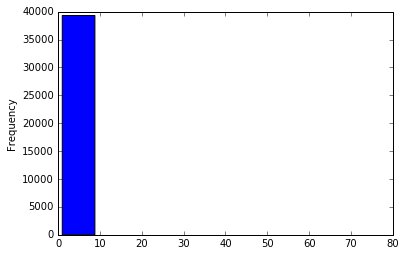

In [42]:
df.kw_avg_avg.value_counts().plot('hist')

In [46]:
df.self_reference_min_shares.value_counts()

0.0         7174
1100.0      1727
1300.0      1362
1200.0      1349
1400.0      1106
1500.0       973
1000.0       878
1600.0       827
1700.0       711
1900.0       669
2000.0       656
1800.0       621
2200.0       522
2100.0       477
2500.0       422
2700.0       417
2300.0       370
2400.0       347
2900.0       309
3000.0       305
3200.0       274
2600.0       269
2800.0       254
3500.0       228
3100.0       227
4100.0       203
3400.0       198
3600.0       189
3300.0       183
3900.0       171
            ... 
241.0          1
237.0          1
344.0          1
347.0          1
44300.0        1
355.0          1
27400.0        1
26500.0        1
407.0          1
26000.0        1
52600.0        1
25100.0        1
118700.0       1
397.0          1
53700.0        1
389.0          1
631.0          1
23400.0        1
22600.0        1
378.0          1
374.0          1
372.0          1
66900.0        1
22000.0        1
21800.0        1
54200.0        1
67700.0        1
21500.0       

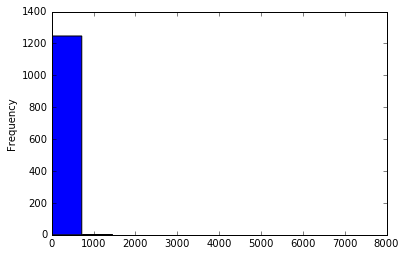

In [43]:
df.self_reference_min_shares.value_counts().plot('hist')

In [47]:
df.self_reference_max_shares.value_counts()

0.0         7175
1200.0       766
1100.0       748
1300.0       737
1500.0       697
1400.0       683
1900.0       681
1600.0       589
2000.0       578
1800.0       555
1700.0       553
2700.0       513
2500.0       507
2200.0       505
2100.0       433
2400.0       405
3200.0       401
2300.0       378
1000.0       371
3000.0       363
2600.0       350
2900.0       349
3500.0       322
2800.0       311
5200.0       302
3400.0       299
3100.0       299
4100.0       290
3600.0       276
4200.0       276
            ... 
97200.0        1
517.0          1
509.0          1
141400.0       1
579.0          1
580.0          1
855.0          1
644.0          1
843.0          1
95300.0        1
80400.0        1
631.0          1
628.0          1
144400.0       1
36200.0        1
622.0          1
35200.0        1
618.0          1
583.0          1
613.0          1
34900.0        1
607.0          1
122800.0       1
600.0          1
76900.0        1
595.0          1
108500.0       1
98500.0       

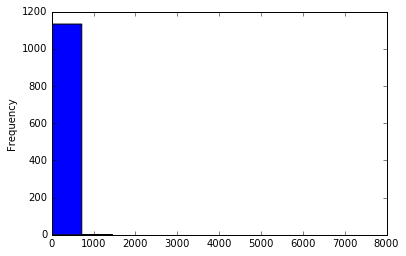

In [44]:
df.self_reference_max_shares.value_counts().plot('hist')

In [48]:
df.self_reference_avg_sharess.value_counts()

0.000000        7174
1200.000000      570
1300.000000      557
1100.000000      540
1400.000000      481
1500.000000      476
1600.000000      424
1700.000000      404
2000.000000      402
1900.000000      372
1800.000000      369
2200.000000      337
2500.000000      336
2100.000000      319
2700.000000      314
1000.000000      280
2300.000000      268
2400.000000      261
3000.000000      242
2900.000000      237
3200.000000      236
2800.000000      223
2600.000000      219
3100.000000      203
3500.000000      199
3300.000000      180
3400.000000      179
4100.000000      178
3600.000000      162
3900.000000      154
                ... 
55050.000000       1
9245.333333        1
2251.400000        1
25347.250000       1
986.666667         1
2127.333333        1
30750.000000       1
2310.766667        1
1419.333333        1
1222.285714        1
30800.000000       1
2253.166667        1
6168.666667        1
2164.666667        1
30850.000000       1
2686.714286        1
2107.806452  

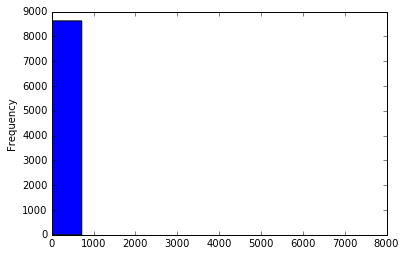

In [45]:
df.self_reference_avg_sharess.value_counts().plot('hist')

In [49]:
df.weekday_is_monday.value_counts()

0.0    32983
1.0     6661
Name: weekday_is_monday, dtype: int64

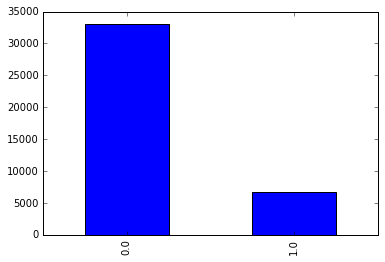

In [46]:
df.weekday_is_monday.value_counts().plot('bar')

In [50]:
df.weekday_is_tuesday.value_counts()

0.0    32254
1.0     7390
Name: weekday_is_tuesday, dtype: int64

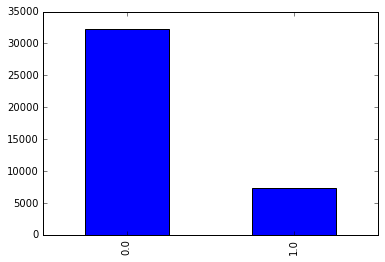

In [47]:
df.weekday_is_tuesday.value_counts().plot('bar')

In [51]:
df.weekday_is_wednesday.value_counts()

0.0    32209
1.0     7435
Name: weekday_is_wednesday, dtype: int64

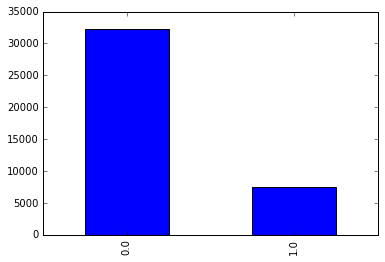

In [48]:
df.weekday_is_wednesday.value_counts().plot('bar')

In [52]:
df.weekday_is_thursday.value_counts()

0.0    32377
1.0     7267
Name: weekday_is_thursday, dtype: int64

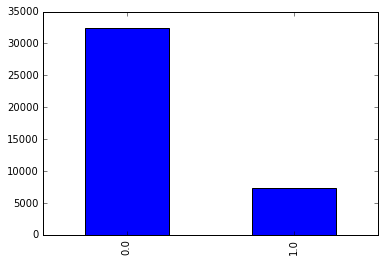

In [49]:
df.weekday_is_thursday.value_counts().plot('bar')

In [53]:
df.weekday_is_friday.value_counts()

0.0    33943
1.0     5701
Name: weekday_is_friday, dtype: int64

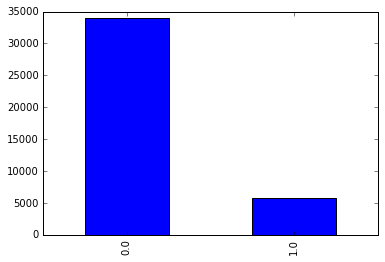

In [50]:
df.weekday_is_friday.value_counts().plot('bar')

In [54]:
df.weekday_is_saturday.value_counts()

0.0    37191
1.0     2453
Name: weekday_is_saturday, dtype: int64

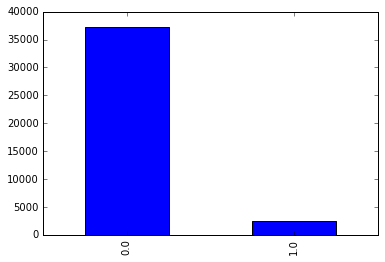

In [51]:
df.weekday_is_saturday.value_counts().plot('bar')

In [55]:
df.weekday_is_sunday.value_counts()

0.0    36907
1.0     2737
Name: weekday_is_sunday, dtype: int64

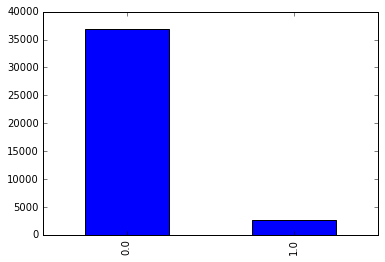

In [52]:
df.weekday_is_sunday.value_counts().plot('bar')

In [56]:
df.is_weekend.value_counts()

0.0    34454
1.0     5190
Name: is_weekend, dtype: int64

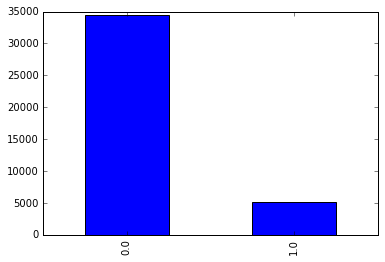

In [53]:
df.is_weekend.value_counts().plot('bar')

In [57]:
df.LDA_00.value_counts()

0.200000    51
0.050000    17
0.050000    14
0.920000    12
0.050000    12
0.040000    10
0.066667     9
0.066667     9
0.066667     8
0.066667     7
0.920000     7
0.066667     6
0.050000     6
0.040000     5
0.066667     5
0.050000     5
0.040000     4
0.040000     4
0.050000     4
0.040000     4
0.839998     4
0.028571     3
0.040000     3
0.899999     3
0.050000     3
0.100000     3
0.066667     3
0.040001     3
0.066667     3
0.066668     3
            ..
0.692018     1
0.175613     1
0.028572     1
0.027154     1
0.630106     1
0.026825     1
0.022273     1
0.028572     1
0.028575     1
0.040001     1
0.033335     1
0.289871     1
0.033668     1
0.022244     1
0.025001     1
0.680902     1
0.033334     1
0.028575     1
0.293706     1
0.020155     1
0.050000     1
0.026158     1
0.040006     1
0.028573     1
0.025000     1
0.025582     1
0.022278     1
0.028572     1
0.033546     1
0.000000     1
Name: LDA_00, dtype: int64

In [58]:
df.LDA_01.value_counts()

0.200000    51
0.050000    36
0.066667    30
0.066667    25
0.040000    24
0.066667    22
0.066667    20
0.050000    16
0.050000    15
0.040000    12
0.050000    11
0.020000    11
0.050000    10
0.040000     9
0.025000     9
0.050000     9
0.066667     8
0.050000     8
0.050000     6
0.040000     6
0.066667     6
0.040000     6
0.050000     6
0.040000     5
0.033333     5
0.040000     5
0.050000     5
0.020000     5
0.025000     5
0.033333     5
            ..
0.028794     1
0.025007     1
0.022270     1
0.171365     1
0.028573     1
0.675065     1
0.040001     1
0.020003     1
0.025842     1
0.399074     1
0.041251     1
0.028598     1
0.028591     1
0.022223     1
0.033339     1
0.416359     1
0.022264     1
0.150573     1
0.150884     1
0.908782     1
0.606396     1
0.041280     1
0.638758     1
0.033334     1
0.020007     1
0.033334     1
0.025963     1
0.885666     1
0.028579     1
0.000000     1
Name: LDA_01, dtype: int64

In [59]:
df.LDA_02.value_counts()

0.200000    51
0.020000     6
0.022222     5
0.020000     4
0.040001     3
0.020000     3
0.028571     3
0.025000     3
0.839996     3
0.839997     2
0.733325     2
0.033333     2
0.839999     2
0.040000     2
0.839997     2
0.799995     2
0.050000     2
0.100000     2
0.799999     2
0.100000     2
0.799996     2
0.066667     2
0.040000     2
0.839997     2
0.066667     2
0.839996     2
0.866664     2
0.839995     2
0.040000     2
0.033334     2
            ..
0.028573     1
0.911109     1
0.355641     1
0.242969     1
0.351355     1
0.033338     1
0.025004     1
0.496551     1
0.239840     1
0.033333     1
0.025033     1
0.839998     1
0.581550     1
0.431310     1
0.911098     1
0.789234     1
0.866664     1
0.033334     1
0.025001     1
0.040001     1
0.233659     1
0.025108     1
0.028572     1
0.264061     1
0.909911     1
0.033370     1
0.040000     1
0.022251     1
0.799996     1
0.000000     1
Name: LDA_02, dtype: int64

In [60]:
df.LDA_03.value_counts()

0.066667    58
0.200000    51
0.050000    25
0.040000    25
0.020000    19
0.050000    19
0.050000    18
0.050000    18
0.050000    14
0.040000    13
0.066667    12
0.040000    11
0.066667    10
0.050000     9
0.025000     9
0.100000     8
0.066667     8
0.066667     8
0.040000     8
0.050000     7
0.040000     6
0.066667     6
0.050000     6
0.022222     6
0.050000     6
0.066667     6
0.040000     6
0.033333     5
0.050000     5
0.040000     5
            ..
0.040297     1
0.022272     1
0.769725     1
0.022261     1
0.898933     1
0.025000     1
0.040006     1
0.025001     1
0.020001     1
0.050362     1
0.020002     1
0.533799     1
0.562268     1
0.741128     1
0.025002     1
0.034139     1
0.022223     1
0.142907     1
0.884448     1
0.730240     1
0.398283     1
0.157037     1
0.652587     1
0.028585     1
0.020084     1
0.020467     1
0.715805     1
0.033336     1
0.728291     1
0.028632     1
Name: LDA_03, dtype: int64

In [61]:
df.LDA_04.value_counts()

0.200000    51
0.020000    19
0.066667     8
0.040000     8
0.040000     6
0.050000     5
0.040000     5
0.050000     5
0.040000     5
0.050000     5
0.040000     5
0.025000     4
0.040000     4
0.040000     4
0.040000     4
0.040000     4
0.050000     4
0.066667     4
0.040000     4
0.050000     3
0.040000     3
0.050000     3
0.050000     3
0.050000     3
0.050000     3
0.050000     3
0.028572     3
0.040000     3
0.050000     3
0.050000     3
            ..
0.050004     1
0.030276     1
0.028572     1
0.182037     1
0.599864     1
0.028583     1
0.025175     1
0.179924     1
0.033354     1
0.170050     1
0.020233     1
0.365998     1
0.020009     1
0.030799     1
0.028573     1
0.033333     1
0.142690     1
0.040002     1
0.211651     1
0.020000     1
0.033334     1
0.866644     1
0.022364     1
0.033574     1
0.599986     1
0.885511     1
0.648833     1
0.180915     1
0.793236     1
0.899998     1
Name: LDA_04, dtype: int64

In [62]:
df.global_subjectivity.value_counts()

0.000000    1184
0.500000      36
0.450000      26
0.516667      25
0.400000      24
0.550000      24
0.600000      24
0.433333      23
0.475000      22
0.366667      21
0.466667      21
0.525000      20
0.300000      20
0.533333      19
0.566667      18
0.462500      18
0.483333      17
0.416667      17
0.383333      16
0.700000      15
0.425000      15
0.491667      15
0.333333      15
0.666667      14
0.375000      14
0.316667      13
0.541667      13
0.442857      13
0.458333      13
0.391667      12
            ... 
0.407993       1
0.489340       1
0.384059       1
0.363937       1
0.592761       1
0.433378       1
0.436492       1
0.470864       1
0.369182       1
0.504874       1
0.307263       1
0.553421       1
0.351935       1
0.285635       1
0.626797       1
0.452593       1
0.507591       1
0.475744       1
0.456336       1
0.363095       1
0.519732       1
0.620805       1
0.460939       1
0.383893       1
0.390686       1
0.510373       1
0.380495       1
0.557583      

In [63]:
df.global_sentiment_polarity.value_counts()

 0.000000    1197
 0.150000      30
 0.250000      28
 0.100000      25
 0.166667      25
 0.125000      25
 0.200000      23
 0.175000      22
 0.016667      19
 0.300000      18
 0.050000      17
 0.083333      16
 0.075000      16
 0.216667      15
 0.183333      15
 0.208333      15
 0.091667      15
 0.025000      15
 0.212500      15
 0.066667      14
 0.108333      14
 0.141667      13
 0.233333      13
 0.112500      12
 0.087500      12
 0.088889      12
 0.168750      12
 0.225000      12
 0.187500      11
 0.275000      10
             ... 
 0.235792       1
 0.108148       1
 0.147743       1
 0.104596       1
 0.144101       1
 0.223743       1
 0.237379       1
-0.004895       1
 0.102538       1
 0.183493       1
 0.080947       1
 0.080006       1
 0.067831       1
 0.235224       1
 0.221048       1
 0.096709       1
 0.016786       1
 0.105462       1
 0.117128       1
 0.199755       1
 0.087864       1
 0.073999       1
 0.128784       1
 0.125968       1
 0.102845 

In [64]:
df.global_rate_positive_words.value_counts()

0.000000    1217
0.041667     120
0.040000     117
0.045455     117
0.043478     109
0.050000     105
0.038462     105
0.035714     104
0.034483      98
0.037037      92
0.047619      91
0.033333      91
0.052632      85
0.055556      81
0.058824      80
0.032258      78
0.062500      78
0.030303      78
0.031250      75
0.040816      70
0.029412      69
0.027778      65
0.044444      59
0.025641      55
0.026316      55
0.024390      55
0.028571      53
0.025000      53
0.022727      52
0.051282      50
            ... 
0.063778       1
0.023918       1
0.007168       1
0.022143       1
0.047910       1
0.068000       1
0.040164       1
0.038799       1
0.028907       1
0.032203       1
0.095275       1
0.038069       1
0.047031       1
0.041597       1
0.067445       1
0.018109       1
0.073016       1
0.044578       1
0.019648       1
0.056831       1
0.029976       1
0.045210       1
0.069498       1
0.040074       1
0.050333       1
0.060526       1
0.068722       1
0.048084      

In [65]:
df.global_rate_negative_words.value_counts()

0.000000    2550
0.020408      87
0.019231      84
0.017241      82
0.015385      79
0.022222      77
0.018182      77
0.015873      76
0.021739      76
0.014493      75
0.018868      73
0.015152      72
0.016667      72
0.013333      72
0.014085      70
0.017544      70
0.016949      69
0.020833      69
0.014706      68
0.014925      68
0.012821      68
0.014286      67
0.016129      66
0.013158      64
0.019608      64
0.020000      64
0.011364      64
0.022727      64
0.021277      63
0.010989      62
            ... 
0.014590       1
0.083333       1
0.023471       1
0.035387       1
0.056818       1
0.022431       1
0.044649       1
0.001493       1
0.030570       1
0.051675       1
0.033791       1
0.017597       1
0.031298       1
0.018160       1
0.012638       1
0.017720       1
0.039695       1
0.050909       1
0.042478       1
0.012520       1
0.021915       1
0.013881       1
0.058201       1
0.028704       1
0.011094       1
0.011921       1
0.023425       1
0.015219      

In [67]:
df.rate_positive_words.value_counts()

0.666667    1608
1.000000    1364
0.750000    1302
0.000000    1217
0.500000    1124
0.800000    1037
0.714286     767
0.833333     751
0.600000     726
0.857143     584
0.777778     566
0.625000     546
0.700000     501
0.571429     477
0.727273     468
0.875000     430
0.818182     400
0.769231     385
0.888889     379
0.692308     353
0.636364     332
0.555556     327
0.785714     321
0.733333     285
0.846154     268
0.900000     266
0.615385     264
0.642857     258
0.687500     234
0.909091     223
            ... 
0.863014       1
0.493976       1
0.773913       1
0.563830       1
0.741294       1
0.579365       1
0.598765       1
0.691860       1
0.554217       1
0.599138       1
0.446429       1
0.573604       1
0.530000       1
0.579545       1
0.831510       1
0.710345       1
0.639024       1
0.621053       1
0.551282       1
0.901639       1
0.696629       1
0.377049       1
0.303571       1
0.516556       1
0.873684       1
0.585106       1
0.847059       1
0.843318      

In [68]:
df.rate_negative_words.value_counts()

0.000000    2550
0.333333    1608
0.250000    1302
0.500000    1124
0.200000    1037
0.285714     767
0.166667     751
0.400000     726
0.142857     584
0.222222     566
0.375000     546
0.300000     501
0.428571     477
0.272727     468
0.125000     430
0.181818     400
0.230769     385
0.111111     379
0.307692     353
0.363636     332
0.444444     327
0.214286     321
0.266667     285
0.153846     268
0.100000     266
0.384615     264
0.357143     258
0.312500     234
0.090909     223
0.294118     220
            ... 
0.780488       1
0.327044       1
0.111801       1
0.453488       1
0.560606       1
0.380435       1
0.298387       1
0.122302       1
0.359649       1
0.179775       1
0.329670       1
0.263566       1
0.203333       1
0.095745       1
0.223301       1
0.218310       1
0.237705       1
0.690909       1
0.390187       1
0.379562       1
0.319249       1
0.402116       1
0.339130       1
0.292035       1
0.379845       1
0.558140       1
0.245098       1
0.376963      

In [69]:
df.avg_positive_polarity.value_counts()

0.000000    1217
0.500000     201
0.400000     150
0.350000     117
0.300000     104
0.375000     102
0.450000     101
0.366667      77
0.433333      74
0.416667      68
0.250000      68
0.550000      66
0.333333      62
0.466667      57
0.425000      53
0.325000      53
0.383333      46
0.337500      42
0.437500      40
0.483333      40
0.136364      40
0.266667      38
0.233333      37
0.318182      36
0.475000      36
0.275000      35
0.600000      35
0.316667      35
0.358333      34
0.357143      34
            ... 
0.478926       1
0.267102       1
0.282057       1
0.454823       1
0.308335       1
0.402653       1
0.486529       1
0.294335       1
0.299315       1
0.275942       1
0.309120       1
0.364765       1
0.277879       1
0.431553       1
0.395562       1
0.487365       1
0.503325       1
0.214182       1
0.105748       1
0.304537       1
0.460519       1
0.341185       1
0.444598       1
0.365106       1
0.226545       1
0.306499       1
0.324960       1
0.348887      

In [70]:
df.min_positive_polarity.value_counts()

0.100000    15437
0.033333     7399
0.050000     4412
0.136364     4058
0.062500     2805
0.200000     1372
0.000000     1217
0.250000      645
0.166667      508
0.160000      415
0.500000      258
0.300000      153
0.400000      135
0.083333      133
0.214286      122
0.375000      104
0.150000      100
0.285714       94
0.350000       87
0.333333       75
0.600000       19
0.357143       19
0.433333       16
0.125000       13
0.227273       10
0.700000        8
1.000000        8
0.800000        7
0.366667        6
0.416667        4
0.450000        3
0.900000        1
0.750000        1
Name: min_positive_polarity, dtype: int64

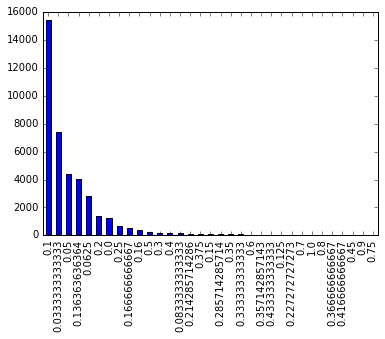

In [54]:
df.min_positive_polarity.value_counts().plot('bar')

In [71]:
df.max_positive_polarity.value_counts()

1.000000    14821
0.500000     6621
0.800000     5604
0.600000     4143
0.700000     3148
0.000000     1217
0.900000     1122
0.750000      716
0.850000      664
0.400000      455
0.375000      161
0.250000      140
0.550000      122
0.300000       77
0.200000       77
0.350000       74
0.136364       65
0.433333       63
0.666667       55
0.333333       49
0.100000       47
0.733333       28
0.357143       27
0.416667       25
0.285714       25
0.214286       22
0.833333       13
0.450000       13
0.160000       12
0.166667       10
0.033333        7
0.650000        6
0.950000        3
0.366667        3
0.062500        3
0.050000        3
0.150000        2
0.227273        1
Name: max_positive_polarity, dtype: int64

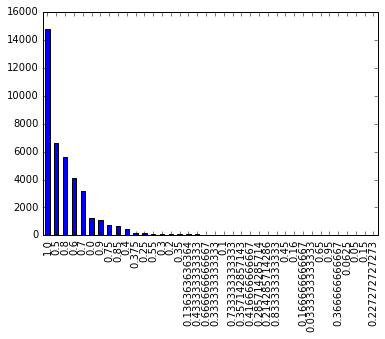

In [55]:
df.max_positive_polarity.value_counts().plot('bar')

In [72]:
df.avg_negative_polarity.value_counts()

 0.000000    2550
-0.125000     499
-0.400000     444
-0.200000     444
-0.250000     404
-0.300000     387
-0.166667     386
-0.500000     330
-0.100000     302
-0.150000     220
-0.187500     202
-0.350000     200
-0.155556     176
-0.175000     168
-0.275000     168
-0.333333     153
-0.225000     145
-0.208333     141
-0.283333     139
-0.312500     136
-0.183333     134
-0.133333     130
-0.262500     128
-0.162500     126
-0.450000     125
-0.216667     123
-0.600000     122
-0.375000     120
-0.266667     118
-0.233333     117
             ... 
-0.303974       1
-0.297361       1
-0.227646       1
-0.290846       1
-0.359352       1
-0.269982       1
-0.380268       1
-0.295926       1
-0.189742       1
-0.475579       1
-0.153855       1
-0.215986       1
-0.200559       1
-0.465385       1
-0.176128       1
-0.323792       1
-0.271519       1
-0.187173       1
-0.219495       1
-0.366071       1
-0.127877       1
-0.205425       1
-0.176257       1
-0.333965       1
-0.272553 

In [73]:
df.min_negative_polarity.value_counts()

-0.500000    6894
-1.000000    5553
-0.400000    3962
-0.600000    3712
-0.800000    3045
-0.700000    2604
 0.000000    2550
-0.300000    1910
-0.200000    1482
-0.250000    1284
-0.166667    1001
-0.125000     702
-0.333333     477
-0.666667     471
-0.291667     355
-0.750000     354
-0.100000     346
-0.900000     341
-0.187500     333
-0.312500     324
-0.155556     319
-0.714286     283
-0.625000     252
-0.875000     221
-0.388889     134
-0.433333     132
-0.050000     119
-0.150000      90
-0.071429      80
-0.133333      61
-0.375000      43
-0.316667      39
-0.650000      30
-0.230769      20
-0.550000      19
-0.214286      19
-0.175000      14
-0.025000      11
-0.178571      10
-0.416667       9
-0.142857       8
-0.076923       5
-0.350000       3
-0.466667       3
-0.210000       3
-0.075000       3
-0.566667       3
-0.033333       2
-0.216667       2
-0.083333       2
-0.066667       2
-0.225000       1
-0.012500       1
-0.733333       1
Name: min_negative_polarity,

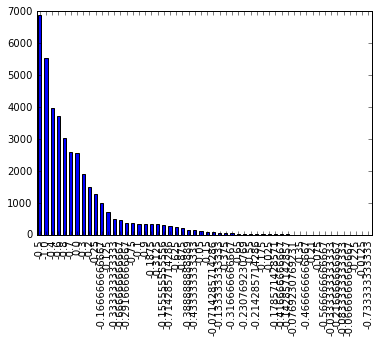

In [56]:
df.min_negative_polarity.value_counts().plot('bar')

In [82]:
df.min_negative_polarity.dtype

dtype('float64')

In [81]:
df.max_negative_polarity.value_counts()

-0.050000    9948
-0.100000    8819
-0.125000    5360
-0.071429    2612
 0.000000    2550
-0.166667    1766
-0.200000    1207
-0.155556    1204
-0.025000     697
-0.187500     617
-0.400000     515
-0.250000     497
-0.150000     478
-0.300000     459
-0.500000     356
-0.075000     259
-0.066667     256
-0.133333     249
-0.083333     236
-0.012500     229
-0.033333     212
-0.008333     194
-0.076923     168
-0.291667     121
-0.333333     100
-0.600000      90
-0.312500      81
-0.700000      56
-1.000000      51
-0.800000      40
-0.175000      32
-0.178571      29
-0.142857      27
-0.388889      27
-0.214286      21
-0.433333      14
-0.230769      14
-0.316667      10
-0.666667      10
-0.375000       7
-0.900000       6
-0.625000       4
-0.714286       4
-0.216667       3
-0.875000       3
-0.210000       2
-0.750000       2
-0.550000       1
-0.225000       1
Name: max_negative_polarity, dtype: int64

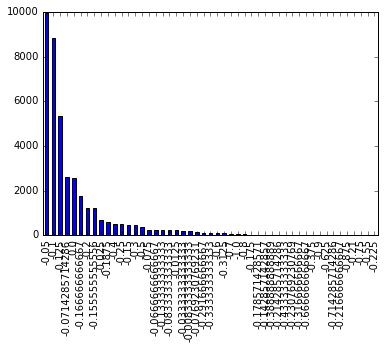

In [57]:
df.max_negative_polarity.value_counts().plot('bar')

In [75]:
df.title_subjectivity.value_counts()

0.000000    18013
0.500000     2642
1.000000     2527
0.400000     1338
0.454545     1148
0.300000      941
0.100000      788
0.200000      707
0.333333      632
0.600000      627
0.900000      613
0.700000      543
0.750000      514
0.066667      431
0.375000      401
0.250000      384
0.666667      384
0.650000      327
0.800000      313
0.550000      228
0.450000      215
0.125000      195
0.288889      188
0.050000      187
0.350000      180
0.833333      154
0.166667      154
0.950000      141
0.642857      135
0.850000      135
            ...  
0.652778        1
0.568182        1
0.413636        1
0.390741        1
0.435000        1
0.351190        1
0.818182        1
0.382143        1
0.713889        1
0.529167        1
0.467208        1
0.370707        1
0.563333        1
0.778571        1
0.772222        1
0.547619        1
0.409848        1
0.652273        1
0.480952        1
0.405303        1
0.288636        1
0.682273        1
0.228571        1
0.206250        1
0.742857  

In [76]:
df.title_sentiment_polarity.value_counts()

 0.000000    19914
 0.500000     2112
 0.136364     1371
 0.250000     1205
 0.100000      883
 0.200000      803
 0.400000      599
 1.000000      551
-0.500000      546
-0.400000      520
-0.200000      490
 0.300000      485
-0.125000      415
-0.100000      389
 0.600000      305
 0.033333      302
 0.350000      247
 0.333333      246
-0.250000      234
-0.050000      227
-0.300000      216
 0.800000      206
 0.050000      195
 0.700000      195
 0.068182      193
-0.166667      190
-0.600000      187
 0.375000      186
-0.155556      181
-1.000000      175
             ...  
 0.170370        1
-0.287879        1
 0.038889        1
-0.121212        1
 0.461905        1
 0.608333        1
 0.098788        1
 0.251515        1
 0.058333        1
-0.468750        1
 0.011538        1
 0.294444        1
 0.330556        1
 0.478788        1
-0.010989        1
-0.034545        1
 0.221645        1
-0.217460        1
 0.120000        1
 0.248148        1
 0.114815        1
-0.051768   

In [77]:
df.abs_title_subjectivity.value_counts()

0.500000    20539
0.000000     2643
0.100000     1965
0.200000     1484
0.400000     1401
0.045455     1154
0.300000     1020
0.166667     1016
0.250000      898
0.125000      510
0.150000      507
0.050000      443
0.433333      431
0.450000      328
0.333333      308
0.350000      259
0.375000      238
0.211111      189
0.083333      170
0.142857      169
0.066667      153
0.133333      123
0.033333      117
0.040000      117
0.272727      100
0.227273       98
0.216667       98
0.022727       88
0.266667       83
0.075000       74
            ...  
0.123016        1
0.059596        1
0.032792        1
0.259596        1
0.068182        1
0.049603        1
0.029091        1
0.135152        1
0.038000        1
0.112374        1
0.136111        1
0.225397        1
0.165945        1
0.345000        1
0.377778        1
0.073737        1
0.042614        1
0.043485        1
0.052381        1
0.113333        1
0.298485        1
0.060390        1
0.145000        1
0.004040        1
0.249459  

In [78]:
df.abs_title_sentiment_polarity.value_counts()

0.000000    19914
0.500000     2658
0.250000     1439
0.136364     1371
0.200000     1293
0.100000     1272
0.400000     1119
1.000000      726
0.300000      701
0.125000      569
0.600000      492
0.050000      422
0.166667      357
0.033333      339
0.333333      319
0.700000      316
0.150000      293
0.350000      291
0.800000      281
0.375000      217
0.068182      196
0.155556      183
0.214286      153
0.062500      124
0.550000      123
0.160000      116
0.450000      112
0.083333      111
0.416667      105
0.187500      104
            ...  
0.223232        1
0.217460        1
0.273810        1
0.090278        1
0.326667        1
0.608333        1
0.049242        1
0.009091        1
0.157576        1
0.098788        1
0.034545        1
0.017857        1
0.478788        1
0.126667        1
0.258095        1
0.480000        1
0.046528        1
0.017424        1
0.294444        1
0.232121        1
0.242857        1
0.010989        1
0.221645        1
0.251515        1
0.051768  

In [79]:
df.shares.value_counts()

1100      2308
1200      2018
1300      1740
1400      1592
1500      1323
1000      1177
1600      1137
1700      1013
1800       889
1900       810
2000       774
2100       661
2200       631
2300       511
2400       506
2600       442
2500       441
2700       435
2800       359
2900       356
3000       348
3100       306
3200       282
3400       271
3300       259
3500       252
3800       240
3600       233
3700       223
3900       200
          ... 
38400        1
139500       1
168          1
104          1
53           1
295          1
72100        1
92600        1
309          1
51500        1
277          1
43200        1
39700        1
149          1
67700        1
85           1
59400        1
8            1
80800        1
75600        1
34500        1
50700        1
42400        1
66900        1
72900        1
197600       1
310800       1
92           1
57800        1
82200        1
Name: shares, dtype: int64

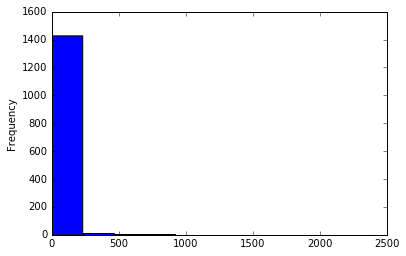

In [58]:
df.shares.value_counts().plot('hist')

In [10]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


This seemed like a good idea. If the shares are more than 1400 (mean of shares)  than it goes into the popular category and if it's less than or equal to 1400 then not so popular category

In [31]:

def shareC(c):
    if c['shares'] > 1400:
        return 1
    elif c['shares'] <= 1400:
        return 0
  

In [32]:
df['Cshares'] = df.apply(shareC, axis=1)

In [33]:
df.Cshares.value_counts()

0    20082
1    19562
Name: Cshares, dtype: int64

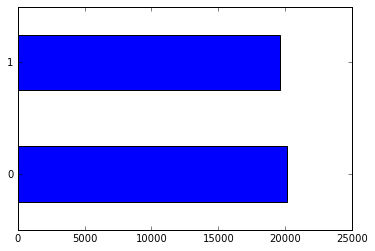

In [34]:
df.Cshares.value_counts().plot('barh')

In [15]:
df.columns

Index([u'url', u'timedelta', u'n_tokens_title', u'n_tokens_content',
       u'n_unique_tokens', u'n_non_stop_words', u'n_non_stop_unique_tokens',
       u'num_hrefs', u'num_self_hrefs', u'num_imgs', u'num_videos',
       u'average_token_length', u'num_keywords', u'data_channel_is_lifestyle',
       u'data_channel_is_entertainment', u'data_channel_is_bus',
       u'data_channel_is_socmed', u'data_channel_is_tech',
       u'data_channel_is_world', u'kw_min_min', u'kw_max_min', u'kw_avg_min',
       u'kw_min_max', u'kw_max_max', u'kw_avg_max', u'kw_min_avg',
       u'kw_max_avg', u'kw_avg_avg', u'self_reference_min_shares',
       u'self_reference_max_shares', u'self_reference_avg_sharess',
       u'weekday_is_monday', u'weekday_is_tuesday', u'weekday_is_wednesday',
       u'weekday_is_thursday', u'weekday_is_friday', u'weekday_is_saturday',
       u'weekday_is_sunday', u'is_weekend', u'LDA_00', u'LDA_01', u'LDA_02',
       u'LDA_03', u'LDA_04', u'global_subjectivity',
       u'global_sen

### Weekdays and Weekends

In [16]:
df[(df.weekday_is_monday==1) & (df.Cshares==1)].Cshares.value_counts()

1    3140
Name: Cshares, dtype: int64

In [42]:
df[(df.weekday_is_tuesday==1) & (df.Cshares==1)].Cshares.value_counts()

1    3359
Name: Cshares, dtype: int64

In [43]:
df[(df.weekday_is_wednesday==1) & (df.Cshares==1)].Cshares.value_counts()

1    3335
Name: Cshares, dtype: int64

In [44]:
df[(df.weekday_is_thursday==1) & (df.Cshares==1)].Cshares.value_counts()

1    3382
Name: Cshares, dtype: int64

In [45]:
df[(df.weekday_is_friday==1) & (df.Cshares==1)].Cshares.value_counts()

1    2865
Name: Cshares, dtype: int64

In [46]:
df[(df.weekday_is_saturday==1) & (df.Cshares==1)].Cshares.value_counts()

1    1720
Name: Cshares, dtype: int64

In [47]:
df[(df.weekday_is_sunday==1) & (df.Cshares==1)].Cshares.value_counts()

1    1761
Name: Cshares, dtype: int64

In [48]:
df[(df.is_weekend==1) & (df.Cshares==1)].Cshares.value_counts()

1    3481
Name: Cshares, dtype: int64

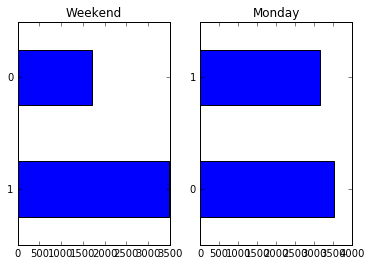

In [51]:
fig, axs = plt.subplots(1,2)
df[df.is_weekend==1].Cshares.value_counts().plot(kind='barh',ax=axs[0], title="Weekend")
df[df.weekday_is_monday==1].Cshares.value_counts().plot(kind='barh',ax=axs[1], title="Monday")
#obvioulsy weekend has more 

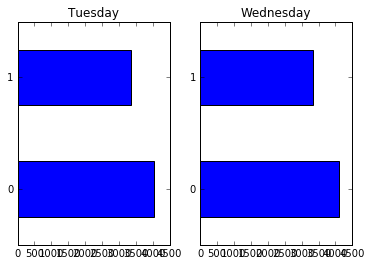

In [54]:
fig, axs = plt.subplots(1,2)
df[df.weekday_is_tuesday==1].Cshares.value_counts().plot(kind='barh',ax=axs[0], title="Tuesday")
df[df.weekday_is_wednesday==1].Cshares.value_counts().plot(kind='barh',ax=axs[1], title="Wednesday")

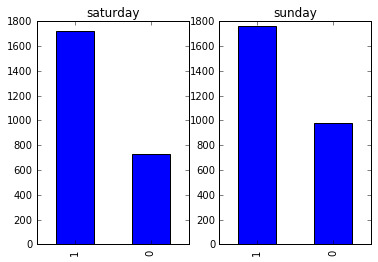

In [56]:
fig, axs = plt.subplots(1,2)
df[df.weekday_is_saturday==1].Cshares.value_counts().plot(kind='bar',ax=axs[0], title="saturday")
df[df.weekday_is_sunday==1].Cshares.value_counts().plot(kind='bar',ax=axs[1], title="sunday")
#Almost the same

### Various  data Channels 

In [58]:
df[(df.data_channel_is_lifestyle==1) & (df.Cshares==1)].Cshares.value_counts()

1    1200
Name: Cshares, dtype: int64

In [59]:
df[(df.data_channel_is_entertainment==1) & (df.Cshares==1)].Cshares.value_counts()

1    2644
Name: Cshares, dtype: int64

In [60]:
df[(df.data_channel_is_bus==1) & (df.Cshares==1)].Cshares.value_counts()

1    3029
Name: Cshares, dtype: int64

In [61]:
df[(df.data_channel_is_socmed==1) & (df.Cshares==1)].Cshares.value_counts()

1    1659
Name: Cshares, dtype: int64

In [62]:
df[(df.data_channel_is_tech==1) & (df.Cshares==1)].Cshares.value_counts()


1    4359
Name: Cshares, dtype: int64

In [73]:
# Tech channel has more 

In [63]:
df[(df.data_channel_is_world==1) & (df.Cshares==1)].Cshares.value_counts()

1    2936
Name: Cshares, dtype: int64

#### Since tech data channel has more , let's see on which day of the week it has. 

In [65]:
df[(df.weekday_is_sunday==1) & (df.data_channel_is_tech) & (df.Cshares==1)].Cshares.value_counts()

1    308
Name: Cshares, dtype: int64

In [67]:
df[(df.weekday_is_friday==1) & (df.data_channel_is_tech) & (df.Cshares==1)].Cshares.value_counts()

1    621
Name: Cshares, dtype: int64

In [69]:
df[(df.weekday_is_saturday==1) & (df.data_channel_is_tech) & (df.Cshares==1)].Cshares.value_counts()

1    426
Name: Cshares, dtype: int64

In [74]:
df[(df.weekday_is_monday==1) & (df.data_channel_is_tech) & (df.Cshares==1)].Cshares.value_counts()

1    696
Name: Cshares, dtype: int64

In [75]:
df[(df.weekday_is_tuesday==1) & (df.data_channel_is_tech) & (df.Cshares==1)].Cshares.value_counts()

1    813
Name: Cshares, dtype: int64

In [76]:
df[(df.weekday_is_wednesday==1) & (df.data_channel_is_tech) & (df.Cshares==1)].Cshares.value_counts()

1    772
Name: Cshares, dtype: int64

In [1]:
#On tuesday, tech data channel has more

### Plots of different data channels

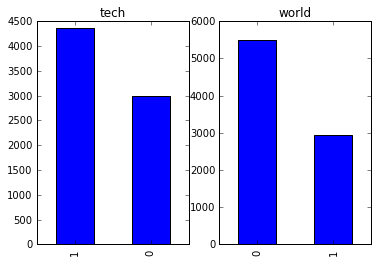

In [70]:
fig, axs = plt.subplots(1,2)
df[df.data_channel_is_tech==1].Cshares.value_counts().plot(kind='bar',ax=axs[0], title="tech")
df[df.data_channel_is_world==1].Cshares.value_counts().plot(kind='bar',ax=axs[1], title="world")

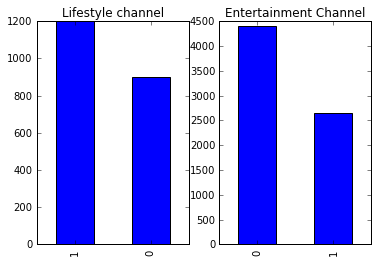

In [57]:
fig, axs = plt.subplots(1,2)
df[df.data_channel_is_lifestyle==1].Cshares.value_counts().plot(kind='bar',ax=axs[0], title="Lifestyle channel")
df[df.data_channel_is_entertainment==1].Cshares.value_counts().plot(kind='bar',ax=axs[1], title="Entertainment Channel")

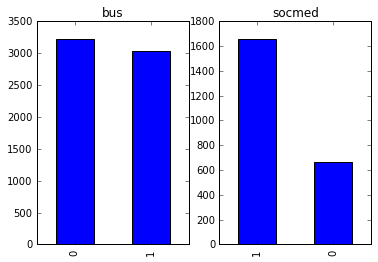

In [72]:
fig, axs = plt.subplots(1,2)
df[df.data_channel_is_bus==1].Cshares.value_counts().plot(kind='bar',ax=axs[0], title="bus")
df[df.data_channel_is_socmed==1].Cshares.value_counts().plot(kind='bar',ax=axs[1], title="socmed")

### OnlineNewsPopularity dataset has no null values and no missing values to handle. 